In [54]:
import os
print(os.environ["PYTHONPATH"])  # Should contain parent dirrectory of image_captioning module

/home/k/retail


In [58]:
import json

import pandas as pd
import numpy as np
import editdistance
import matplotlib.pyplot  as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

import torch

import image_captioning.constants as C
from image_captioning.caption import caption_image_beam_search, visualize_att

In [59]:
with open("metrics.json") as f:
    metrics = json.load(f)
train_metrics = pd.DataFrame(metrics["train"])
train_metrics.columns = ["train_" + c for c in train_metrics.columns]
val_metrics = pd.DataFrame(metrics["val"])
val_metrics.columns = ["val_" + c for c in val_metrics.columns]
test_metrics = pd.DataFrame(metrics["test"])
test_metrics.columns = ["test_" + c for c in test_metrics.columns]
metrics = train_metrics.join(val_metrics).join(test_metrics)
metrics.head()

,train_error,train_losses,val_edit,val_error,val_losses,val_norm_edit,test_edit,test_error,test_losses,test_norm_edit
0,0.991629,3.458718,1.894578,0.977811,3.114235,0.584829,1.715259,0.986544,3.076349,0.563374
1,0.978536,3.029805,1.885542,0.978656,2.909568,0.582952,1.713575,0.984409,2.902966,0.565080
2,0.976175,2.892207,1.872289,0.979290,2.807503,0.580502,1.712427,0.981417,2.803617,0.568814
3,0.980039,2.838981,1.839759,0.976965,2.751471,0.571867,1.706152,0.978743,2.776503,0.570240
4,0.982400,2.795711,1.811446,0.970203,2.715448,0.565432,1.693603,0.973516,2.772539,0.572223


Text(0.5,0,'Epoch')

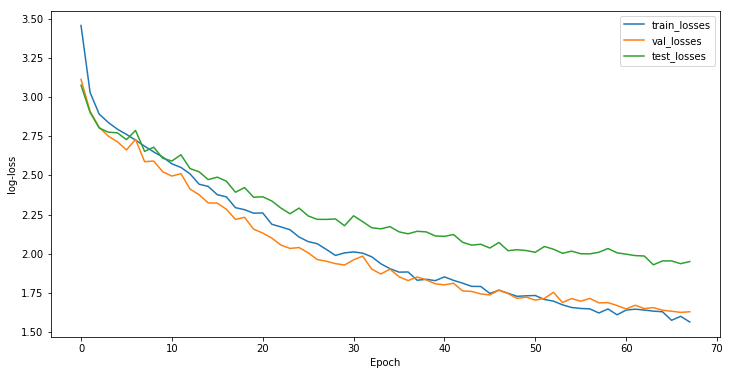

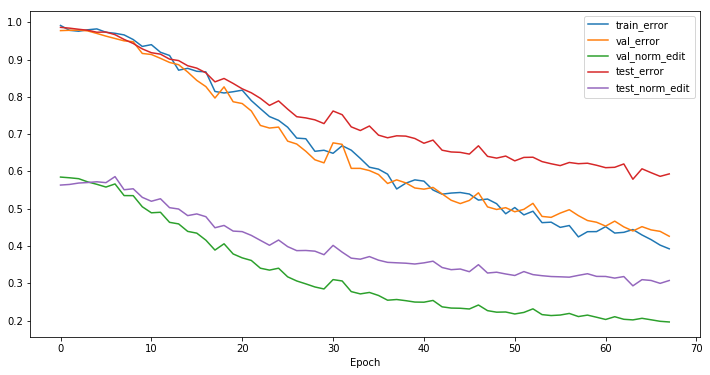

In [60]:
metrics[["train_losses", "val_losses", "test_losses"]].plot(figsize=(12,6))
#plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("log-loss")
metrics[["train_error", "val_error", "val_norm_edit", "test_error", "test_norm_edit"]].plot(figsize=(12,6))
#plt.yscale("log")
plt.xlabel("Epoch")